In [1]:
%cd ..

/mnt/d/sebas/Projects/gerumo


In [2]:
from gerumo import *

In [3]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Models and Ensembles

## load_model_from_experiment

In [4]:
experiment_folder = "/mnt/e/projects/gerumo-results/baseline/alt_az/BMO_UNIT_MST_e166d9"
config, model, assembler = load_model_from_experiment(experiment_folder, assemblers=ASSEMBLERS, custom_objects=CUSTOM_OBJECTS, epoch=29)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


## load_model_from_configuration

In [5]:
model_checkpoint = "/mnt/e/projects/gerumo-results/baseline/alt_az/BMO_UNIT_MST_e166d9/checkpoints/BMO_UNIT_MST_MST_FlashCam_mae_e029_0.0137.h5"
model_config_file = "/mnt/e/projects/gerumo-results/baseline/alt_az/BMO_UNIT_MST_e166d9/bmo_mst.json"
config, model, assembler = load_model_from_configuration(model_checkpoint, model_config_file, assemblers=ASSEMBLERS, custom_objects=CUSTOM_OBJECTS)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


## load_assembler_from_configuration


In [15]:
assembler_config_file = "/mnt/d/sebas/Projects/gerumo/train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_kde.json"
assembler_config, assembler=load_assembler_from_configuration(assembler_config_file, assemblers=ASSEMBLERS)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


## get_target_mode_config

In [16]:
target_mode_config = get_target_mode_config(assembler_config)
target_mode_config

{'target_domains': ([1.15, 1.3], [-0.25, 0.25]),
 'target_shapes': (inf, inf),
 'target_resolutions': (inf, inf)}

# Data

## load_dataset_from_experiment

In [7]:
ret = load_dataset_from_experiment(experiment_folder, include_samples_dataset=True)
(generator, dataset), (sample_generator, sample_dataset) = ret

/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


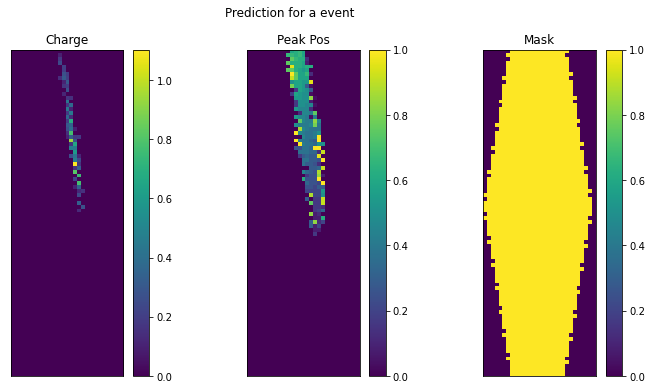

In [8]:
x_batch, y_batch, meta_batch = generator[0]
# event i: 0
xi = (x_batch[0][0], x_batch[1][0]) # (image, telescope_features)
plot_input_sample(xi[0], input_image_mode=config["input_image_mode"], input_features_sample=xi[1], make_simple=True)

## load_dataset_from_configuration

In [9]:
ret = load_dataset_from_configuration(model_config_file, include_samples_dataset=True)
(generator, dataset), (sample_generator, sample_dataset) = ret

/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


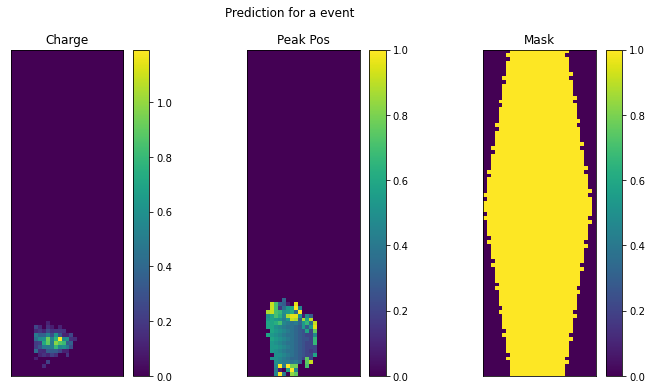

In [10]:
x_batch, y_batch, meta_batch = generator[0]
# event i: 0
xi = (x_batch[0][0], x_batch[1][0]) # (image, telescope_features)
plot_input_sample(xi[0], input_image_mode=config["input_image_mode"], input_features_sample=xi[1], make_simple=True)

## load_dataset_from_assembler_config

In [25]:
describe_dataset(sample_generator.dataset)

files 2
events 5
observations 15
obsevation by telescopes
MST_FlashCam    15
Name: type, dtype: int64


In [17]:
ret = load_dataset_from_assembler_configuration(assembler_config_file, include_samples_dataset=True)
(assembler_generator, assembler_dataset), (assembler_sample_generator, assembler_sample_dataset, assembler_sample_telescopes) = ret

/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


9


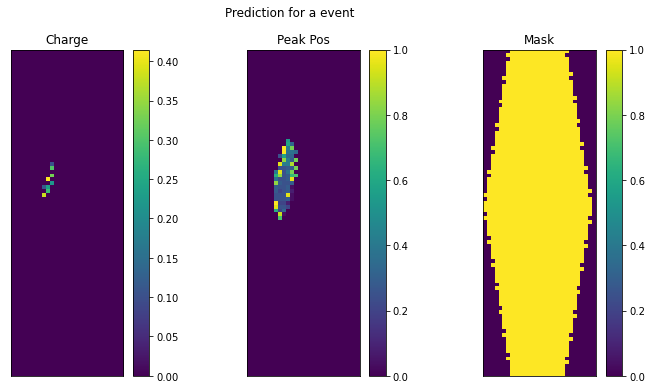

In [12]:
b = 1 #3
i = 2 #6

X_batch, y_batch, meta_batch = assembler_generator[b]
Xi = X_batch[i]
y_i_true = y_batch[i]
Xi_mst = Xi["MST_FlashCam"]
print(len(Xi_mst[0]))
# telescope t0
Xi_mst_t0 = (Xi_mst[0][0], Xi_mst[1][0]) # (image, telescope_features)
plot_input_sample(Xi_mst_t0[0], input_image_mode=assembler_config["input_image_mode"], input_features_sample=Xi_mst_t0[1], make_simple=True)